<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2

### <center> Автор материала: Мария Тараканова (@Masha Noiseless)

## <center> Индивидуальный проект по анализу данных </center>

В проекте используются данные по кредитным картам клиентов.
Данные можно скачать отсюда: [default of credit card clients Data Set](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

pylab.rcParams['figure.figsize'] = (16, 7)
mpl.rcParams['figure.figsize'] = (16,7)

Populating the interactive namespace from numpy and matplotlib


### 1. Описание набора данных и признаков

Представлены данные за полгода (апрель - сентябрь 2005) по клиентам банка в Тайване.

**Список переменных:**

 - **LIMIT_BAL** - Величина выдаваемого кредита: включает как индивидуальный потребительский кредит, так и его / ее семейный (дополнительный) кредит.

- **SEX** - Пол (1 = мужчина; 2 = женщина)

- **EDUCATION** - Образование (1 = аспиратура; 2 = высшее образование; 3 = среднее образование; 4 = другое).

- **MARRIAGE** - Семейное положение (1 = женат/замужем; 2 = одинокий; 3 = другое).

- **AGE** - Возраст (в годах).

- **PAY_0 ... PAY_6** - История платежей. Отслеживались прошлые ежемесячные платежные записи (с Апреля по Сентябрь, 2005) следующим образом: PAY_0 = статус погашения в Сентябре, 2005, ..., PAY_6 = статус погашения в Апреле, 2005. Шкала измерения для статуса погашения: -1 = оплачен вовремя; 1 = оплата задержана на месяц; ... 8 = оплата задержана на 8 месяцев; 9 = оплата задержана на 9 месяцев и больше.

- **BILL_AMT1	... BILL_AMT6** - Сумма выписки по счету в каждый из месяцев. BILL_AMT1 = Сентябрь, 2005; ...  BILL_AMT6 = Апрель, 2005.

- **PAY_AMT1 ... PAY_AMT6** - Сумма предыдущего платежа. PAY_AMT1 = выплаченная сумма в Сентябре, 2005; ... 
 PAY_AMT6 = выплаченная сумма в Апреле, 2005.
 
Целевая переменная: **default payment next month** - неуплата в следующем месяце, бинарная (1 = да, 0 = нет). 
 

In [2]:
data = pd.read_excel('default of credit card clients.xls', header=1)

### 2. Первичный анализ данных

In [3]:
data.head().T

,0,1,2,3,4
ID,1,2,3,4,5
LIMIT_BAL,20000,120000,90000,50000,50000
SEX,2,2,2,2,1
EDUCATION,2,2,2,2,2
MARRIAGE,1,2,2,1,1
AGE,24,26,34,37,57
PAY_0,2,-1,0,0,-1
PAY_2,2,2,0,0,0
PAY_3,-1,0,0,0,-1
PAY_4,-1,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

Как видно, в данных нет пропущенных значений, тип всех переменных int64.

Выведем основные харакетристики признаков.

In [5]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [6]:
# для удобства переименуем целевую переменную
data = data.rename(columns = {'default payment next month':'target'})

Distribution of target:


0    0.7788
1    0.2212
Name: target, dtype: float64

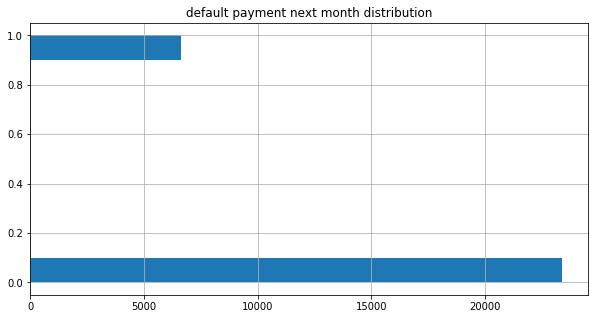

In [7]:
ax = data['target'].hist(orientation='horizontal', figsize=(10,5))
ax.set_title("default payment next month distribution")

print('Distribution of target:')
data['target'].value_counts() / data.shape[0]

Выборка не сбалансирована, одного класса больше чем другого.

Исследуем категориальные признаки $SEX$ (пол), $EDUCATION$ (образование) и $MARRIAGE$ (семейное положение).

In [8]:
print(data['SEX'].value_counts())
print('***')
print(data['EDUCATION'].value_counts())
print('***')
print(data['MARRIAGE'].value_counts())

2    18112
1    11888
Name: SEX, dtype: int64
***
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
***
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


В переменной $EDUCATION$ кроме заявленных категорий (1 = аспиратура; 2 = высшее образование; 3 = среднее образование; 4 = другое) появились неизвестные категории 0, 5 и 6. Проведем дополнительное исследование этих параметров.

In [9]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [10]:
%%time
data2 = data[(data['EDUCATION'] == 0) | (data['EDUCATION'] == 5)| (data['EDUCATION'] == 6) |
             (data['EDUCATION'] == 4)]
scaler = StandardScaler()
scaler.fit(data2)
print('Размер нового датасета: {}'.format(data2.shape))
tsne_model = TSNE(2,  random_state=17)
data2_2d = tsne_model.fit_transform(scaler.transform(data2))

Размер нового датасета: (468, 25)
CPU times: user 13.8 s, sys: 376 ms, total: 14.1 s
Wall time: 14.1 s


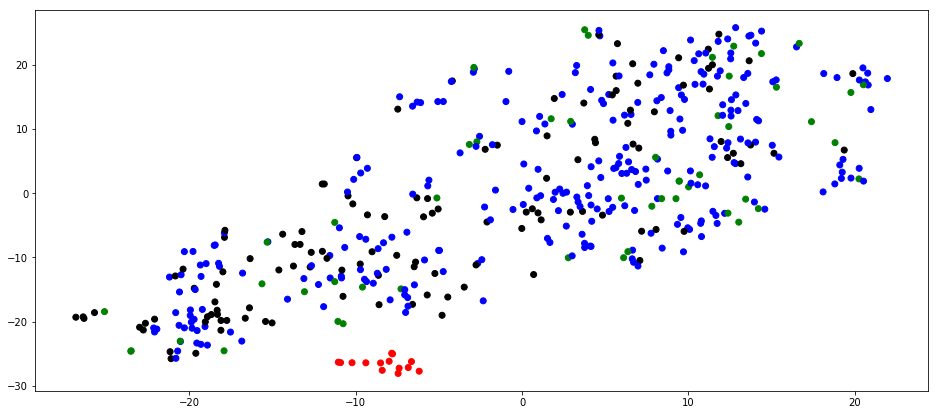

In [11]:
plt.scatter(data2_2d[:, 0], data2_2d[:, 1], color = ['red' if i == 0 else (
    'blue' if i==5 else ('black' if i == 4 else 'green')) for i in data2['EDUCATION']])

Категория 0, выделенная красным, четко отделена от категорий 4,5 и 6. Значит можем объединить их в одну категорию 4.

In [9]:
data['EDUCATION'].replace([5, 6], 4, inplace=True)

Аналогично в признаке $MARRIAGE$ появилась неизвестная категория 0. Исследуем этот случай.

In [12]:
%%time
data2 = data[(data['MARRIAGE'] == 0) | (data['MARRIAGE'] == 3)]
scaler = StandardScaler()
scaler.fit(data2)
print('Размер нового датасета: {}'.format(data2.shape))
tsne_model = TSNE(2,  random_state=17)
data2_2d = tsne_model.fit_transform(scaler.transform(data2))

Размер нового датасета: (377, 25)
CPU times: user 7.05 s, sys: 284 ms, total: 7.33 s
Wall time: 7.34 s


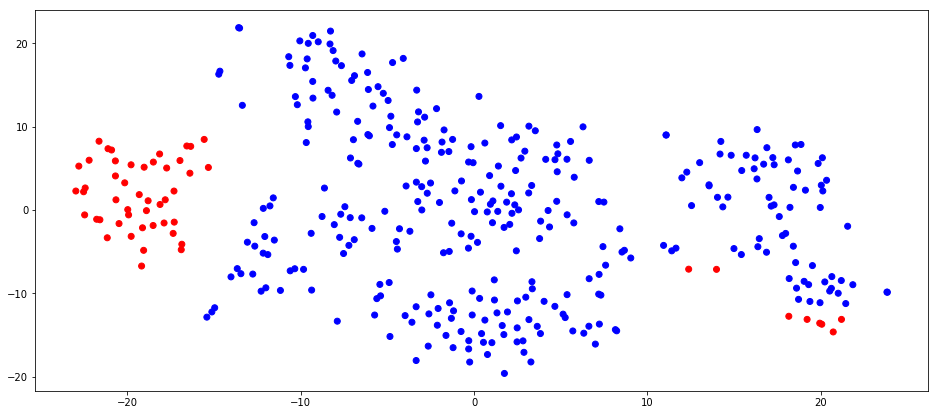

In [13]:
plt.scatter(data2_2d[:, 0], data2_2d[:, 1], color = ['red' if i == 0 else 'blue' for i in data2['MARRIAGE']])

В целом, категория 0 выделена в отдельную группу, кроме нескольких точек.

### 3. Первичный визуальный анализ данных

Исследуем зависимость категориальных признаков $SEX$  (пол),  $EDUCATION$  (образование), $PAY\_i,  i = 1,...,6$ (статус платежа в $i$-том месяце) и  $MARRIAGE$  (семейное положение) от целевой переменной $target$.

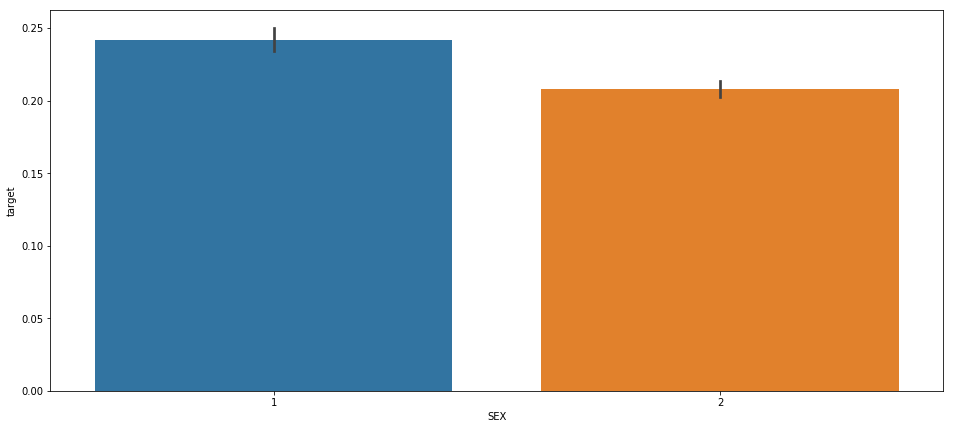

In [10]:
sns.barplot(x='SEX', y='target', data=data)

Доля неуплативших долг у мужчин ($SEX$=1), чуть больше, чем у женщин ($SEX$=2), но в целом существенной разницы нет.

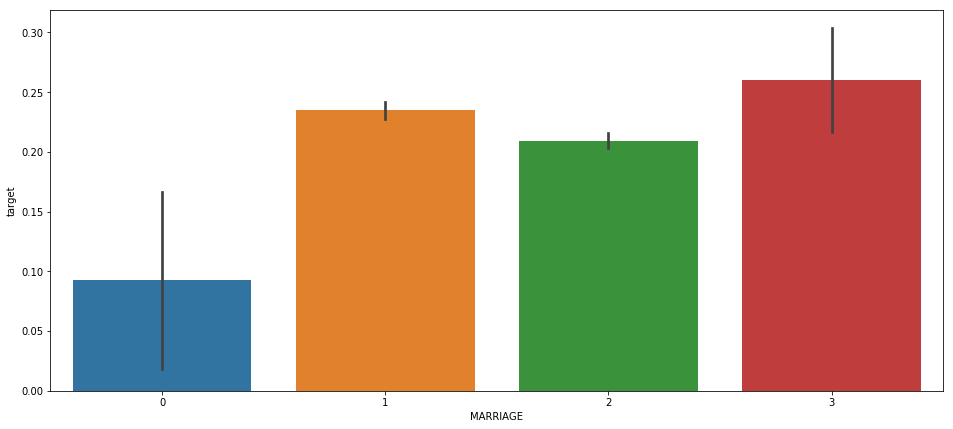

In [11]:
sns.barplot(x='MARRIAGE', y='target', data=data)

Доля неуплативших долг в незаявленной категории ($MARRIAGE$ = 0) меньше, чем в других.

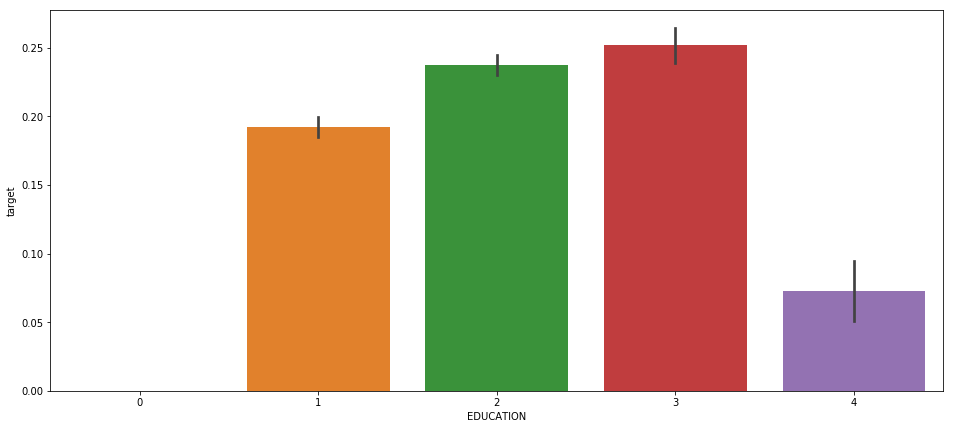

In [12]:
sns.barplot(x='EDUCATION', y='target', data=data)

Доля неуплативших долг людей со средним образованием ($EDUCATION$ = 3) больше, чем в остальных. Причем в незаявленной категории

($EDUCATION$ = 0) неуплативших нет.

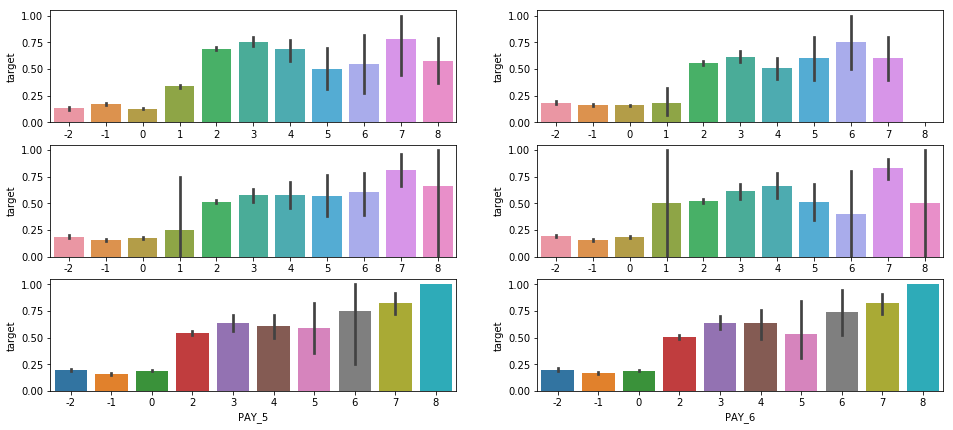

In [13]:
data = data.rename(columns = {'PAY_0':'PAY_1'})
pays = ['PAY_%s' % i for i in range(1,7)]
for i, pay in enumerate(pays):
    plt.subplot(3, 2, i + 1)
    sns.barplot(x=pay,y='target', data=data)

Можно заметить, что чем больше задержка оплаты долга, тем вероятней его неуплата.

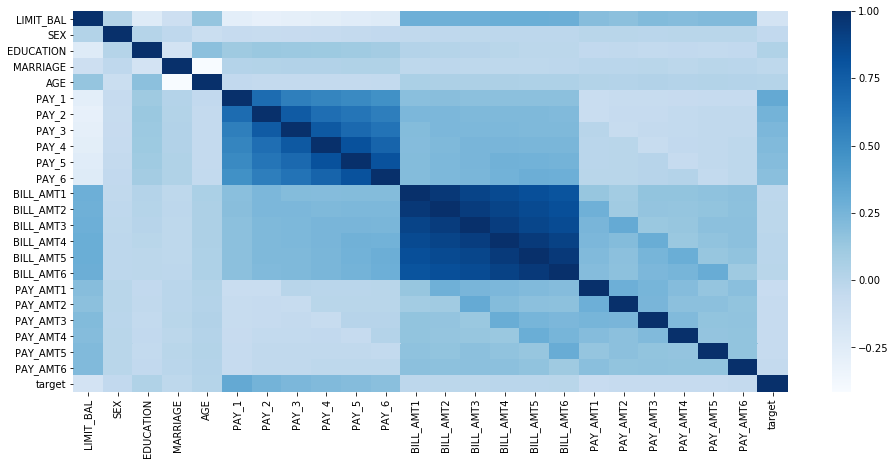

In [14]:
corr_matrix = data.drop('ID', axis=1).corr()
sns.heatmap(corr_matrix, cmap="Blues")

Видно, что признаки  $BILL\_AMTi, i = 1,...6$ (сумма выписки по счету в $i$-том месяце) коррелируют между собой, как и признаки $PAY\_i,  i = 1,...,6$ (статус платежа в $i$-том месяце)

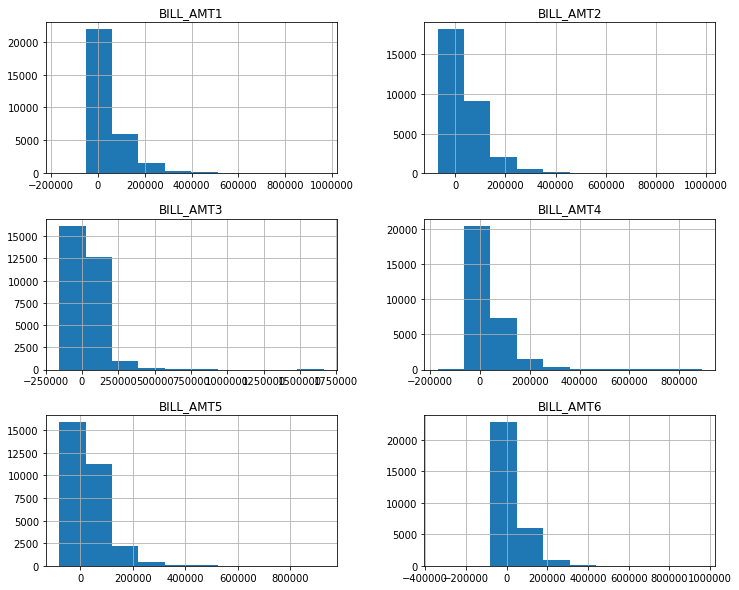

In [15]:
bills = ['BILL_AMT%s' % i for i in range(1,7)]
plots = data[bills].hist(figsize=(12,10))

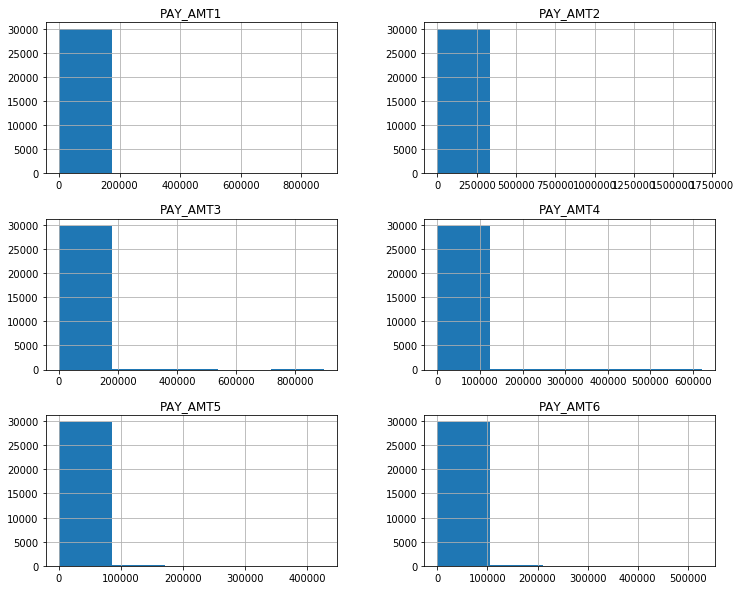

In [16]:
pay_amts = ['PAY_AMT%s' % i for i in range(1,7)]
plots = data[pay_amts].hist(figsize=(12,10), bins = 5)

### 4. Выбор метрики и модели

Так как в выборке есть дисбаланс данных, то в качестве целевой метрики будем использовать *roc_auc_score*, так же, для контроля, будем использовать *f1_score* и *accuracy*. 

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score

Для построения модели будем использовать три разных классификатора: логистическую регрессию, случайный лес и градиентный бустинг.

In [18]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [19]:
def learning_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_roc = model.predict_proba(X_test)[:,1]
    score_roc = roc_auc_score(y_test, y_roc)
    score_f1 = f1_score(y_test, y_pred, average='weighted')
    score_acc = accuracy_score(y_test, y_pred)
    print('roc_auc = {}'.format(score_roc))
    print('f1_score = {}'.format(score_f1))
    print('acuracy_score={}'.format(score_acc))
    return y_roc, score_roc, score_f1, score_acc

Так как выборка не сбалансирована, то будем использовать дополнительную настройку для случайного леса и логистической регрессии - *class_weight='balanced'*

In [29]:
forest = RandomForestClassifier(n_estimators=50, random_state=17, 
                            class_weight='balanced')
logit = LogisticRegression(random_state=17, class_weight= 'balanced')
boosting = GradientBoostingClassifier(random_state=17)

### 5. Предобработка данных и  создание новых признаков

Удалим столбец $ID$, для дальнейшего исседования он не нужен. 
Признак $SEX$ перекодируем в значения 0 ($SEX$=2) и 1 ($SEX$=1) и переименуем этот признак  в $male$ (0 – женщина, 1 – мужчина).

In [21]:
data = data.drop('ID', axis=1)
data['SEX'] = data['SEX'].apply(lambda x: 0 if x==2 else 1 )
data = data.rename(columns = {'SEX':'male'})

Можно заметить, что переменные $BILL\_AMTi, i = 1,...6$ сильно коррелируют между собой, создадим переменную $balance$, в которую запишем разницу между $BILL\_AMTi$ сумма выписки по счету в $i$-том месяце) и $PAY\_AMT\_i$ (выплаченная сумма в $i$-том месяце).

In [22]:
balances = ['balance_%s' % i for i in range(1,7)]

for i in range(6):
    data[balances[i]] = data[bills[i]] - data[pay_amts[i]]

Скорее всего хорошие клиенты никогда (или редко) задерживают платеж, тогда у клиентов с низким средним значением $PAY\_i,  i = 1,...,6$ вероятнее не будет неуплаты платежа в следующем месяце. Создадим бинарный признак $good\_client$, где 1 - среднее значение < 0, 0 - среднее значение > 0. 

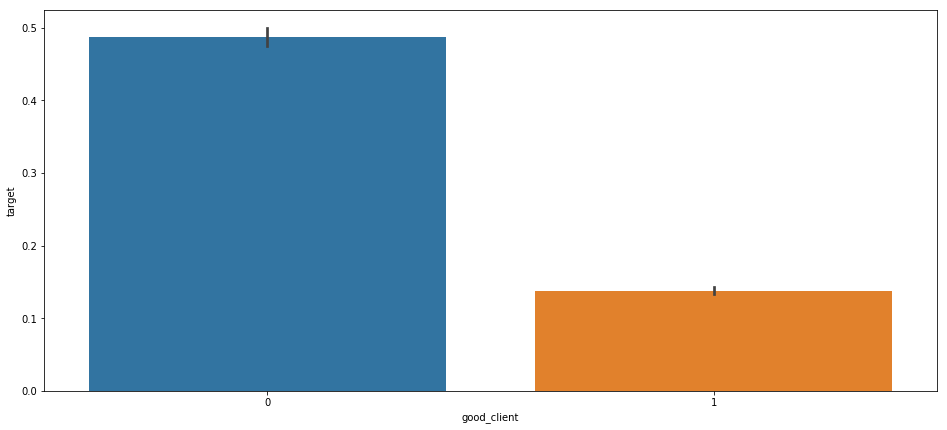

In [23]:
data['pay_mean'] = (data['PAY_1'] + data['PAY_2'] + data['PAY_3'] + data['PAY_4'] + data['PAY_5']\
                    + data['PAY_6'] ) / 6
data['good_client'] = data['pay_mean'].apply(lambda x: 1 if x <= 0 else 0).astype('int')
data = data.drop('pay_mean', axis=1)
sns.barplot(x='good_client', y='target', data=data)

Судя по графику разница между "хорошими" клиентами и "плохими" есть, ее влияние на предсказание оценим ниже.

Из категориальных переменных $EDUCATION$, $MARRIAGE$ и $PAY\_i$ (статус погашения в $i$-том месяце) сделаем дамми-переменные

In [24]:
col_for_dum = ['EDUCATION', 'MARRIAGE'] + pays
data = pd.get_dummies(data, columns=col_for_dum )
data.head()

,LIMIT_BAL,male,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,0,24,3913,3102,689,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,0
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,...,0,0,1,0,0,0,0,0,0,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,...,0,0,1,0,0,0,0,0,0,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,0,0,1,0,0,0,0,0,0,0


Разобьем выборку на тестовую и обучающую.

In [25]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], 
                                                    test_size=0.3, 
                                                    random_state=17,
                                                   stratify = data['target'])

/home/maria/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
from sklearn.preprocessing import StandardScaler

Отдельно маштабируем признаки $PAY\_AMT\_i$ (выплаченная сумма в $i$-том месяце), $AGE$, $LIMIT\_BAL$ и новые колонки $balance\_i$ в тестовой и отложенной выборке.

In [27]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

Построим предсказания на заданных классификаторах без настройки гиперпараметров.

In [30]:
print('RandomForest:') 
learning_model(forest, X_train_scaled, y_train, X_test_scaled, y_test);
print('LogisticRegression:')
learning_model(logit, X_train_scaled, y_train, X_test_scaled, y_test);
print('GradientBoostingClassifier:')
learning_model(boosting, X_train_scaled, y_train, X_test_scaled, y_test);

RandomForest:
roc_auc = 0.757693505781008
f1_score = 0.7913785376254888
acuracy_score=0.8143333333333334
LogisticRegression:
roc_auc = 0.7725627787592318
f1_score = 0.7800517965089763
acuracy_score=0.772
GradientBoostingClassifier:
roc_auc = 0.7857973951694023
f1_score = 0.7989277103309093
acuracy_score=0.8198888888888889


Оценим важность признаков с помощью дерева решений.

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
tree_sel = DecisionTreeClassifier(random_state=17)
tree_sel.fit(X_train_scaled, y_train)
features = pd.DataFrame(tree_sel.feature_importances_,
                        index=X_train.columns, 
                        columns=['Importance'])

features.sort_values(by = 'Importance', ascending=False).head(20)

,Importance
good_client,0.129053
AGE,0.066804
LIMIT_BAL,0.051698
PAY_AMT3,0.047467
BILL_AMT1,0.045927
PAY_AMT6,0.040949
PAY_1_2,0.038596
PAY_AMT1,0.038123
balance_1,0.036865
balance_3,0.035011


Наибольшую важность имеют признаки $good\_client$, $AGE$, $LIMIT\_BAL$, созданные признаки $balance\_i$ так же входят в 20 самых важных признаков.

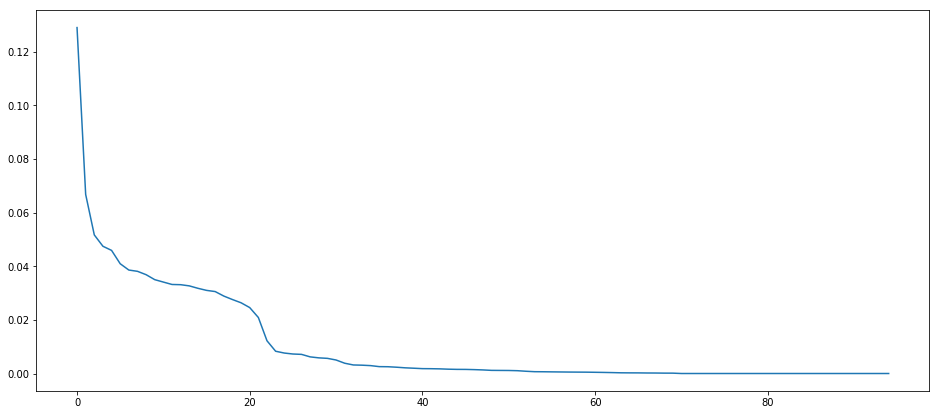

In [33]:
f_sort = features.sort_values(by = 'Importance', ascending=False)
plt.plot(range(len(f_sort.Importance.tolist())), 
         f_sort.Importance.tolist())

Отберем только 45 самых важных признаков.

In [46]:
col = f_sort.iloc[:45].T.columns
X_train_new = X_train_scaled[col]
X_test_new = X_test_scaled[col]

### 6. Кросс-валидация и настройка гиперпараметров модели

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV

In [37]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=17)

In [39]:
logit_parameters = {'C': np.logspace(0, 1, 10)}

boosting_parameters = {'n_estimators': [100, 150],
                       'learning_rate': [0.01, 0.05, 0.5],
                       'max_depth': [5, 6, 7],
                       'max_features': [0.3, 0.5, 0.75, 1.0], 
                       'min_samples_leaf': [4, 5, 6]}

forest_parameters = {'n_estimators': [50, 75, 100],
                     'max_depth': [3, 6, 9, 12],
                     'max_features': [0.5, 0.75, 1.0]}

In [40]:
grid_logit = GridSearchCV(logit, logit_parameters, n_jobs=-1, scoring ='roc_auc', cv=sss)

grid_boosting = GridSearchCV(boosting, boosting_parameters, n_jobs=-1, scoring ='roc_auc', cv=sss)

grid_forest = GridSearchCV(forest, forest_parameters, n_jobs=-1, scoring ='roc_auc', cv=sss)

In [47]:
y_score = [] 
roc_scores, f1_scores, acc_scores = [], [], []
for grid in (grid_logit, grid_boosting, grid_forest):
    y, roc, f1, acc = learning_model(grid, X_train_new, y_train, 
                                     X_test_new , y_test);
    y_score.append(y)
    roc_scores.append(roc)
    f1_scores.append(f1)
    acc_scores.append(acc)

roc_auc = 0.7720541409090229
f1_score = 0.7798658663796789
acuracy_score=0.7717777777777778
roc_auc = 0.7860740001428886
f1_score = 0.7972839573697298
acuracy_score=0.819
roc_auc = 0.7814772697713257
f1_score = 0.7707974031436174
acuracy_score=0.76


Лучший результат показал градиентный бустинг с $roc\_auc = 0.786$

In [49]:
max_feat = grid_boosting.best_params_['max_features']
min_leaf = grid_boosting.best_params_['min_samples_leaf']
n_est = grid_boosting.best_params_['n_estimators']

### 7. Построение кривых валидации и обучения

In [50]:
from sklearn.model_selection import learning_curve, validation_curve

def plot_learning_curve(estimator, title, X, y,label_y, ylim=None, cv=None, scoring='roc_auc', 
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(label_y)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/home/maria/.local/lib/python3.5/site-packages/matplotlib/pyplot.py'>

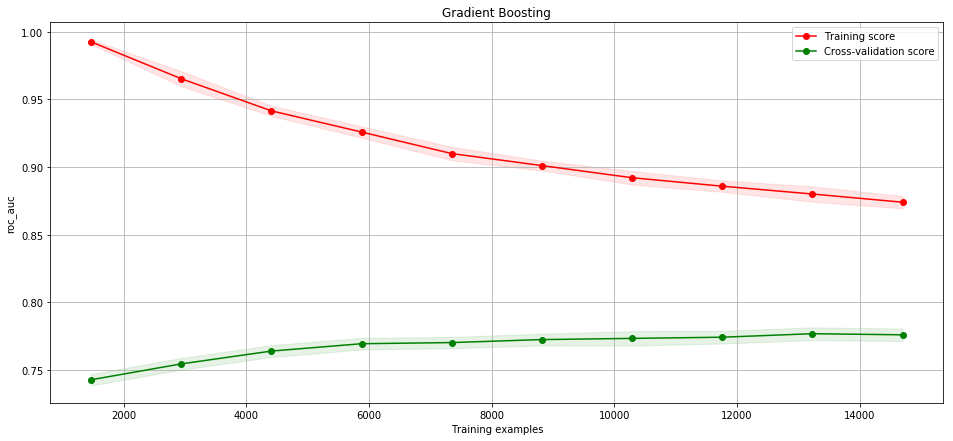

In [51]:
plot_learning_curve(GradientBoostingClassifier(random_state=17, learning_rate=0.05, max_depth=6,
                                               n_estimators=n_est,
                                               min_samples_leaf=min_leaf, max_features=max_feat), 
                    'Gradient Boosting',
                    X_train_new, y_train, scoring='roc_auc', cv=sss, n_jobs=-1, label_y='roc_auc')

<module 'matplotlib.pyplot' from '/home/maria/.local/lib/python3.5/site-packages/matplotlib/pyplot.py'>

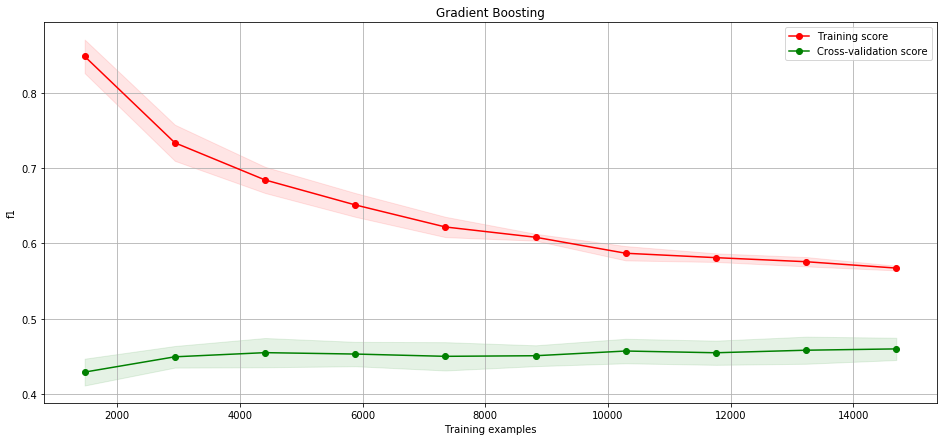

In [52]:
plot_learning_curve(GradientBoostingClassifier(random_state=17, learning_rate=0.05, max_depth=6,
                                               n_estimators=n_est,
                                               min_samples_leaf=min_leaf, max_features=max_feat), 
                    'Gradient Boosting',
                    X_train_new, y_train, scoring='f1', cv=sss, n_jobs=-1, label_y='f1')

<module 'matplotlib.pyplot' from '/home/maria/.local/lib/python3.5/site-packages/matplotlib/pyplot.py'>

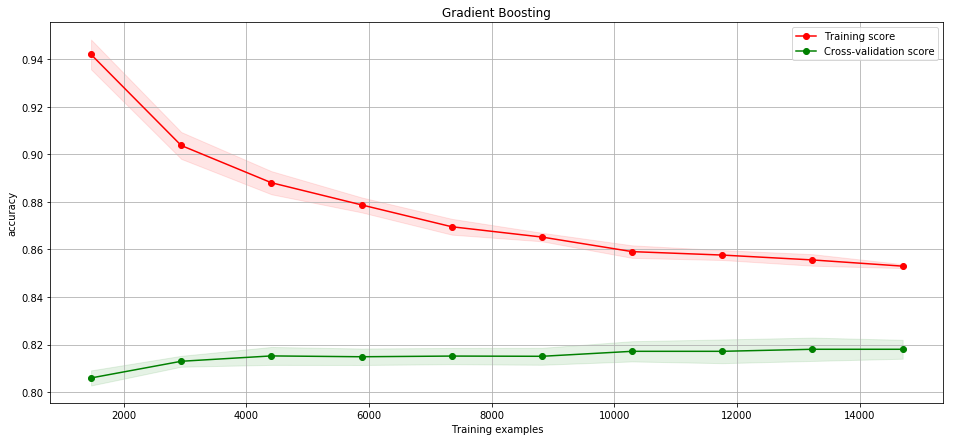

In [53]:
plot_learning_curve(GradientBoostingClassifier(random_state=17, learning_rate=0.05, max_depth=6,
                                               n_estimators=n_est,
                                               min_samples_leaf=min_leaf, max_features=max_feat), 
                    'Gradient Boosting',
                    X_train_new, y_train, scoring='accuracy', cv=sss, n_jobs=-1, label_y='accuracy')

In [54]:
def plot_validation_curve(estimator, X, y,  cv_param_name, cv_param_values,ylim=None, cv=None,
                        scoring='roc_auc',
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel(cv_param_name) 
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)
    val_train, val_test = validation_curve(estimator, X, y, cv_param_name,
                                           cv_param_values, cv=cv,
                                                  scoring=scoring)
    val_train_mean = np.mean(val_train, axis=1)
    val_train_std = np.std(val_train, axis=1)
    val_test_mean = np.mean(val_test, axis=1)
    val_test_std = np.std(val_test, axis=1)
    plt.grid()

    plt.fill_between(cv_param_values,  val_train_mean -  val_train_std,
                      val_train_mean +  val_train_std, alpha=0.1,
                     color="r")
    plt.fill_between(cv_param_values, val_test_mean - val_test_std,
                     val_test_mean + val_test_std, alpha=0.1, color="g")
    plt.plot(cv_param_values, val_train_mean, 'o-', color="r",
             label="Training score")
    plt.plot(cv_param_values, val_test_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


<module 'matplotlib.pyplot' from '/home/maria/.local/lib/python3.5/site-packages/matplotlib/pyplot.py'>

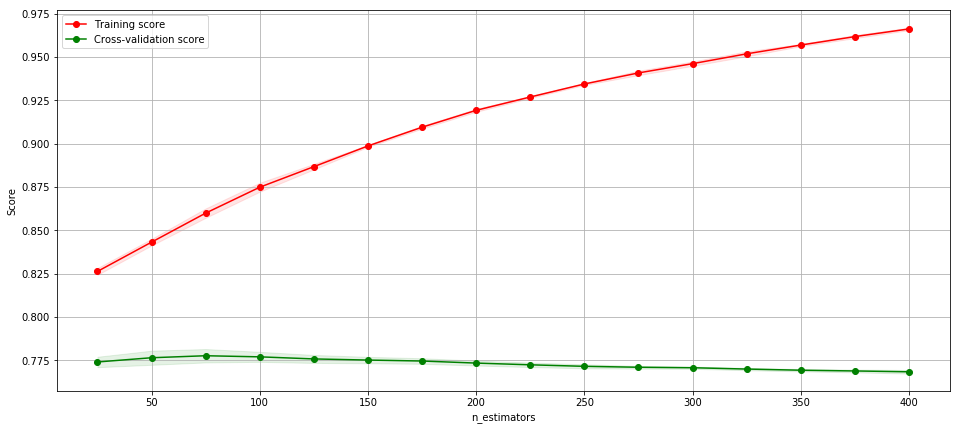

In [55]:
estimators = np.arange(25, 425, 25)
plot_validation_curve(GradientBoostingClassifier(random_state=17, learning_rate=0.05, max_depth=6,
                                                 min_samples_leaf =min_leaf, max_features=max_feat), 
                      X_train_new, y_train, 
                      cv_param_name='n_estimators', 
                      cv_param_values= estimators,
                   scoring='roc_auc')

<module 'matplotlib.pyplot' from '/home/maria/.local/lib/python3.5/site-packages/matplotlib/pyplot.py'>

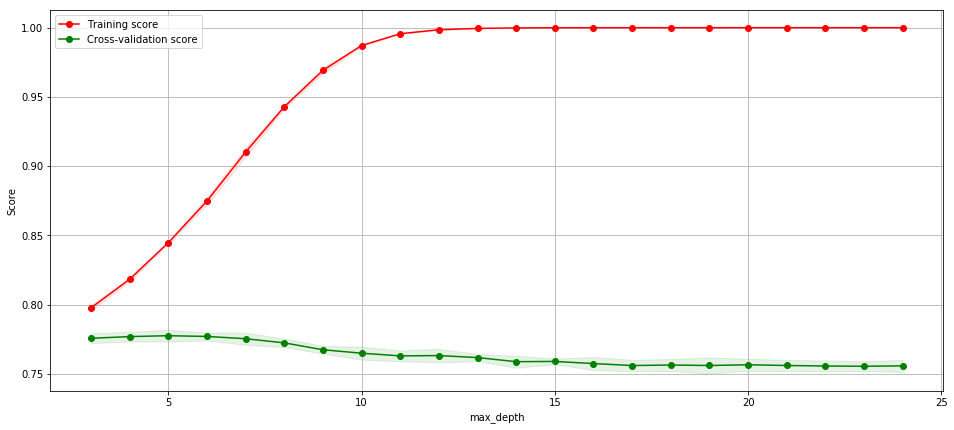

In [56]:
depth = np.arange(3, 25)
plot_validation_curve(GradientBoostingClassifier(random_state=17, learning_rate=0.05, 
                                               n_estimators=n_est,
                                               min_samples_leaf =min_leaf, max_features=max_feat), 
                      X_train_new, y_train, 
                      cv_param_name='max_depth', 
                      cv_param_values= depth,
                   scoring='roc_auc')

<module 'matplotlib.pyplot' from '/home/maria/.local/lib/python3.5/site-packages/matplotlib/pyplot.py'>

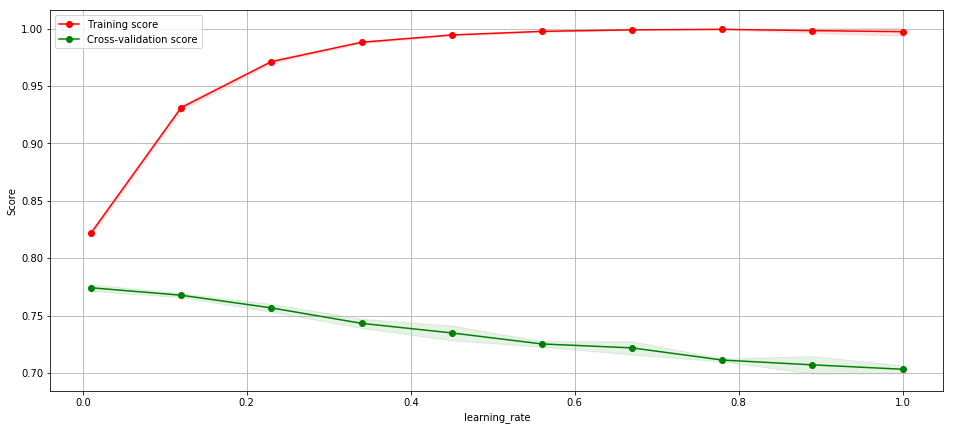

In [57]:
learn_rate = np.linspace(0.01, 1.0, 10)
plot_validation_curve(GradientBoostingClassifier(random_state=17, max_depth=6,
                                               n_estimators=n_est,
                                               min_samples_leaf =min_leaf, max_features=max_feat), 
                      X_train_new, y_train, 
                      cv_param_name='learning_rate', 
                      cv_param_values= learn_rate,
                   scoring='roc_auc')

<module 'matplotlib.pyplot' from '/home/maria/.local/lib/python3.5/site-packages/matplotlib/pyplot.py'>

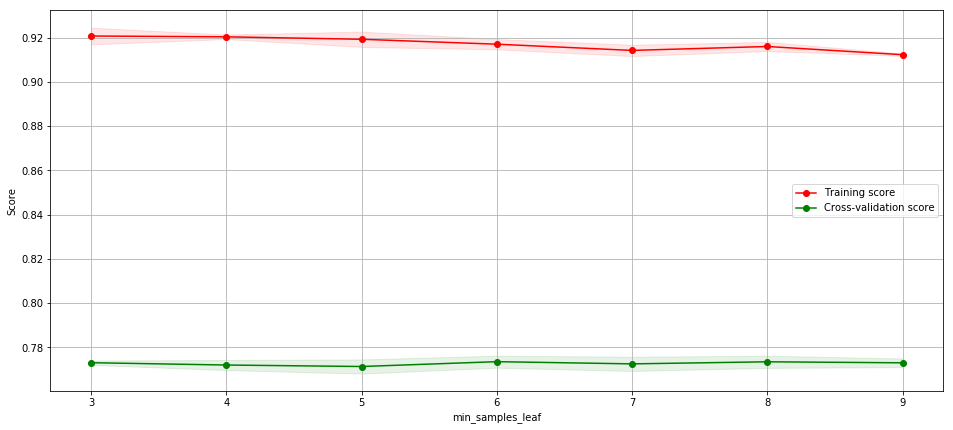

In [58]:
min_l = np.arange(3, 10)
plot_validation_curve(GradientBoostingClassifier(random_state=17, max_depth=6,
                                               n_estimators=n_est,max_features=max_feat), 
                      X_train_new, y_train, 
                      cv_param_name='min_samples_leaf', 
                      cv_param_values= min_l,
                   scoring='roc_auc')

### 8. Прогноз для тестовой или отложенной выборке

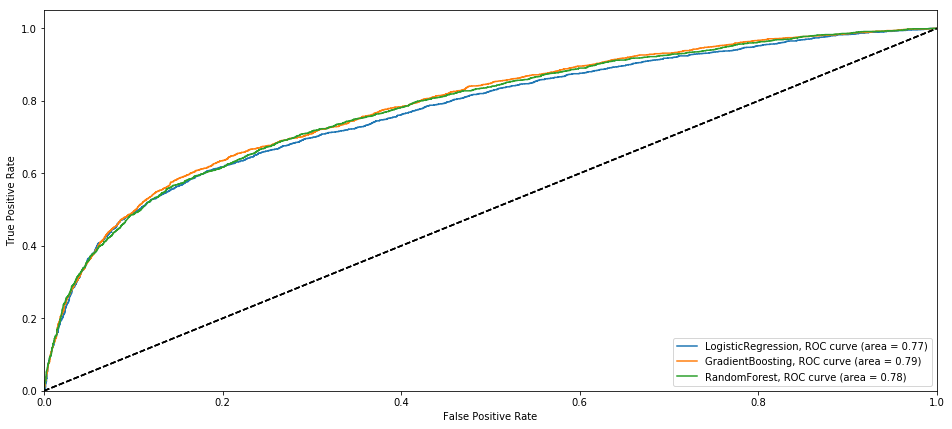

In [59]:
labels = ['LogisticRegression', 'GradientBoosting', 'RandomForest']
from sklearn.metrics import roc_curve, auc
for i in range(3):
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_score[i])
    roc_auc = auc(fpr, tpr)
    # Plot of a ROC curve for a specific class
    plt.figure(1)
    plt.plot(fpr, tpr, label=labels[i]+', ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

In [60]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization


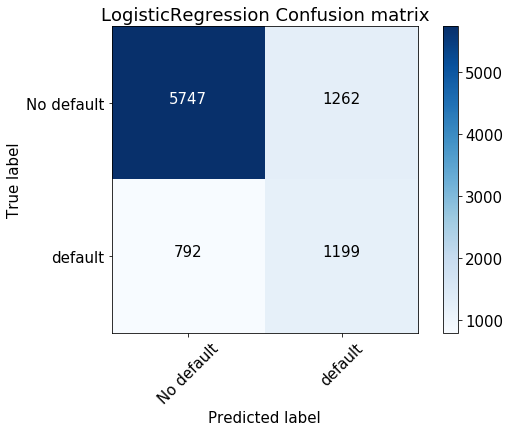

In [62]:
font = {'size' : 15}
plt.rc('font', **font)
cnf_matrix = confusion_matrix(y_test, grid_logit.predict(X_test_new))
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['No default', 'default'], title=labels[0]+' Confusion matrix')
plt.show()

Confusion matrix, without normalization


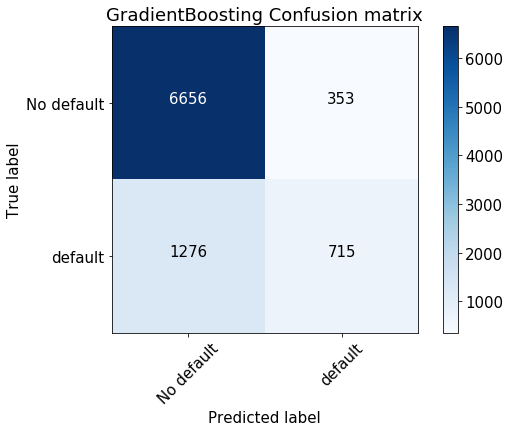

In [63]:
font = {'size' : 15}
plt.rc('font', **font)
cnf_matrix = confusion_matrix(y_test, grid_boosting.predict(X_test_new))
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['No default', 'default'], title=labels[1]+' Confusion matrix')
plt.show()

Confusion matrix, without normalization


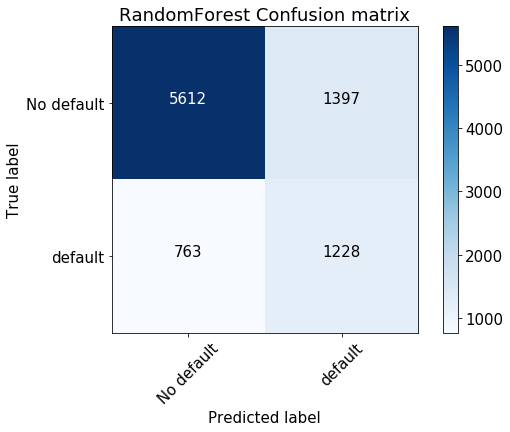

In [64]:
font = {'size' : 15}
plt.rc('font', **font)
cnf_matrix = confusion_matrix(y_test, grid_forest.predict(X_test_new))
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['No default', 'default'], title=labels[2]+' Confusion matrix')
plt.show()

In [65]:
scores = pd.DataFrame({'roc_auc_score': roc_scores, 'f1_score': f1_scores, 'accuracy': acc_scores}, 
                      index=labels)
scores

,accuracy,f1_score,roc_auc_score
LogisticRegression,0.771778,0.779866,0.772054
GradientBoosting,0.819000,0.797284,0.786074
RandomForest,0.760000,0.770797,0.781477


### 9. Выводы

Построены модели предсказания оплаты долга клиентом в следующем месяце по информации о предыдущих шести месяцев. Модель градиентного бустинга дает примерно 79% точности на отложенных 30% выборки, но по матрицам ошибок видно, что градиентный бустинг  сильно ошибается, предсказывая класс "нет уплаты" (*"No default"*), когда на самом деле неуплата (*"default"*) происходит.  

Были построены кривые обучения и валидационные кривые. Кривые обучения показывают, что при увеличении размера выборки, кривые будут сходиться. В данном случае, объем выборки недостаточен.

По валидационным кривым видно, что гиперпараметры, подобранные с помощью GridSearchCV являются оптимальными.